Import bibliotek

In [1]:
import string
import nltk
import json
import numpy as np
import pandas as pd
import itertools as it
import operator as op

from nltk import ngrams
from wordcloud import WordCloud
from matplotlib import pyplot as plt
from nltk import word_tokenize
from nltk.corpus import PlaintextCorpusReader
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

# Korpus dokumentów

In [2]:
corpus_dir = "./streszczenie_original"
corpus = PlaintextCorpusReader(corpus_dir, ".*\\.txt")
files_names = corpus.fileids()
files_names

['Harry Potter i Czara Ognia.txt',
 'Harry Potter i Insygnia Smierci.txt',
 'Harry Potter i Kamien Filozoficzny.txt',
 'Harry Potter i Komnata Tajemnic.txt',
 'Harry Potter i Ksiaze Polkrwi.txt',
 'Harry Potter i Przeklete Dziecko.txt',
 'Harry Potter i Wiezien Azkabanu.txt',
 'Harry Potter i Zakon Feniksa.txt',
 'Opowiesci z Narni. Kon i jego chlopiec.txt',
 'Opowiesci z Narni. Ksiaze Kaspian.txt',
 'Opowiesci z Narni. Lew, czarownica i stara szafa.txt',
 'Opowiesci z Narni. Ostatnia bitwa.txt',
 'Opowiesci z Narni. Podroz Wedrowca do Switu.txt',
 'Opowiesci z Narni. Siostrzeniec Czarodzieja.txt',
 'Opowiesci z Narni. Srebrne krzeslo.txt',
 'Zmierzch.Ksiezyc w Nowiu.txt',
 'Zmierzch.Przed Switem.txt',
 'Zmierzch.Zacmienie.txt',
 'Zmierzch.Zmierzch.txt',
 'Zmierzch.Zycie i Smierc.txt']

# Wstępne przygotowanie dokumentów

In [3]:
documents= {}
for file in files_names:
    documents[file] = corpus.raw(file)
print(json.dumps(documents, indent=4, ensure_ascii=False))

{
    "Harry Potter i Czara Ognia.txt": "Lord Voldemort, wraz ze swoim sługą Glizdogonem przybywa do domu należącego niegdyś do rodziny Riddle'ów położonego w Little Hangleton. Tam układają plan dotyczący zamordowania Harry'ego Pottera, co ma pomóc Czarnemu Panu w odzyskaniu jego dawnej mocy. Jest także mowa o wiernym słudze Czarnego Pana, który wkrótce ma znaleźć się w Hogwarcie. Wszystko to słyszy mieszkający nieopodal ogrodnik, Frank Bryce. Voldemort odkrywając, iż mężczyzna podsłuchuje, zaprasza go do środka i uśmierca. Harry budzi się z przerażającego snu. Jego blizna pulsuje okropnym bólem. Próbuje sobie przypomnieć o czym śnił, a z pamięci wyłania się obraz mrocznego pokoju, węża leżącego przed kominkiem oraz Glizdogona i Lorda Voldemorta planujących morderstwo. Harry zastanawia się czy powinien komuś powiedzieć o problemach z blizną, ponieważ, gdy bolała go ostatnim razem, Voldemort wdarł się do Hogwartu. Ostatecznie postanawia napisać do Syriusza i zejść na śniadanie. W trakci

In [4]:
stoplist_file = open("./stopwords_pl.txt", "r", encoding="utf-8")
stoplist = stoplist_file.read()
stoplist_file.close()
stoplist = stoplist[4:]
stoplist

'is file was created from the carrot2 project and is distributed under the BSD license.\n# See http://project.carrot2.org/license.html\n# Also see http://www.opensource.org/licenses/bsd-license.html\n# From trunk/core/carrot2-util-text/src-resources/stopwords.pl\nvol\no.o.\nmgr\ngodz\nzł\nwww\npl\nul\ntel\nhab\nprof\ninż\ndr\ni\nu\naby\nalbo\nale\nani\naż\nbardzo\nbez\nbo\nbowiem\nby\nbyli\nbym\nbył\nbyła\nbyło\nbyły\nbyć\nbędzie\nbędą\nchce\nchoć\nco\ncoraz\ncoś\nczy\nczyli\nczęsto\ndla\ndo\ngdy\ngdyby\ngdyż\ngdzie\ngo\nich\nim\ninne\niż\nja\njak\njakie\njako\nje\njednak\njednym\njedynie\njego\njej\njest\njeszcze\njeśli\njeżeli\njuż\nją\nkiedy\nkilku\nkto\nktóra\nktóre\nktórego\nktórej\nktóry\nktórych\nktórym\nktórzy\nlat\nlecz\nlub\nma\nmają\nmamy\nmi\nmiał\nmimo\nmnie\nmogą\nmoże\nmożna\nmu\nmusi\nna\nnad\nnam\nnas\nnawet\nnic\nnich\nnie\nniej\nnim\nniż\nno\nnowe\nnp\nnr\no\nod\nok\non\none\noraz\npan\npo\npod\nponad\nponieważ\npoza\nprzed\nprzede\nprzez\nprzy\nraz\nrazie\nroku\nrów

In [5]:
# Pomijamy na macoes -> brak pakietu morfeusz2
# import morfeusz2
#
# def lemmatize(text):
#     morf = morfeusz2.Morfeusz()
#     segments = it.groupby(morf.analyse(text))
#     def disambiguate(group):
#         pairs = ((len(descr), lemma) for _, _, (_, lemma, descr, _, _,) in group)
#         perpl, lemma = min(pairs)
#         return lemma.split(":")[0]
#     lemmas = (disambiguate(group) for key, group in segments)
#     return " ".join(filter(str.isalpha, lemmas))

In [6]:
for key in documents:
    documents[key] = documents[key].lower()
    documents[key] = "".join([char for char in documents[key] if char not in string.punctuation])
    # documents[key] = lemmatize(documents[key]) # wylaczone na macoes
    documents[key] = " ".join([word for word in word_tokenize(documents[key], language='polish') if word not in stoplist])
print(json.dumps(documents, indent=4, ensure_ascii=False))  # przetworzone slowa do slow podstawowych

{
    "Harry Potter i Czara Ognia.txt": "lord voldemort wraz swoim sługą glizdogonem przybywa domu należącego niegdyś rodziny riddleów położonego little hangleton układają plan dotyczący zamordowania harryego pottera pomóc czarnemu panu odzyskaniu dawnej mocy mowa wiernym słudze czarnego pana wkrótce znaleźć hogwarcie słyszy mieszkający nieopodal ogrodnik frank bryce voldemort odkrywając mężczyzna podsłuchuje zaprasza środka uśmierca harry budzi przerażającego snu blizna pulsuje okropnym bólem próbuje przypomnieć czym śnił pamięci wyłania obraz mrocznego pokoju węża leżącego kominkiem glizdogona lorda voldemorta planujących morderstwo harry zastanawia powinien komuś powiedzieć problemach blizną bolała ostatnim razem voldemort wdarł hogwartu ostatecznie postanawia napisać syriusza zejść śniadanie trakcie śniadania wuj vernon otrzymuje list weasleyowie oferują zabranie harryego finał mistrzostw świata quidditchu ugoszczenie resztę wakacji długim namyśle użyciu harryego odpowiednich argum

# Utworzenie macierzy częstości

In [7]:
docs = pd.DataFrame().from_dict(documents, orient='index')
docs.columns = ['content']
docs # [tabela tytul, content]

content
Harry Potter i Czara Ognia.txt                      lord voldemort wraz swoim sługą glizdogonem pr...
Harry Potter i Insygnia Smierci.txt                 podczas zebrania śmierciożerców odbywa dworze ...
Harry Potter i Kamien Filozoficzny.txt              ulicy privet drive pojawia stary człowiek dług...
Harry Potter i Komnata Tajemnic.txt                 wuj vernon zły hedwiga robi bałagan domu tymcz...
Harry Potter i Ksiaze Polkrwi.txt                   mugolskiego premiera odwiedza korneliusz knot ...
Harry Potter i Przeklete Dziecko.txt                scena pierwsza druga opowiada historię została...
Harry Potter i Wiezien Azkabanu.txt                 harry leży kocami łóżku odrabia prace domowe z...
Harry Potter i Zakon Feniksa.txt                    dudley zły wyżywa harrym dudley zostaje zaatak...
Opowiesci z Narni. Kon i jego chlopiec.txt          akcja książki rozgrywa narnii czasów panowania...
Opowiesci z Narni. Ksiaze Kaspian.txt               mija wydarzeń opisanych powieści lew czarownic...
Opowiesci z Narni. Lew, czarownica i stara szaf...  1940 wielka brytania piotr zuzanna edmund łucj...
Opowiesci z Narni. Ostatnia bitwa.txt               julia eustachy zostają wezwani narnii pomóc za...
Opowiesci z Narni. Podroz Wedrowca do Switu.txt     łucja edmund przyjechali swego kuzyna eustache...
Opowiesci z Narni. Siostrzeniec Czarodzieja.txt     książka opisuje stworzenie narnii aslana czym ...
Opowiesci z Narni. Srebrne krzeslo.txt              pewnego dnia eustachy scrubb szkolna koleżanka...
Zmierzch.Ksiezyc w Nowiu.txt                        kontynuacja losów bohaterów powieści filmu zmi...
Zmierzch.Przed Switem.txt                           przygotowania ślubu idą pełną parą bella martw...
Zmierzch.Zacmienie.txt                              edward cullen ukochana bella swan znowu razem ...
Zmierzch.Zmierzch.txt                               zmierzch opowiada historię 17letniej belli swa...
Zmierzch.Zycie i Smierc.txt                         odzwierciedlając fabułę twilight life death tw...

In [8]:
count_vertorizer = CountVectorizer()
counts_tf = count_vertorizer.fit_transform(docs['content'])
counts_tf.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(20, 7334))

In [9]:
tfidf_vectorizer = TfidfVectorizer()
counts_tfidf = tfidf_vectorizer.fit_transform(docs['content'])
counts_tfidf.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.02007235, 0.02283504, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], shape=(20, 7334))

# Chmury tagów

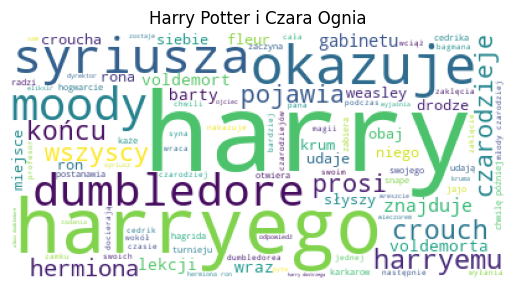

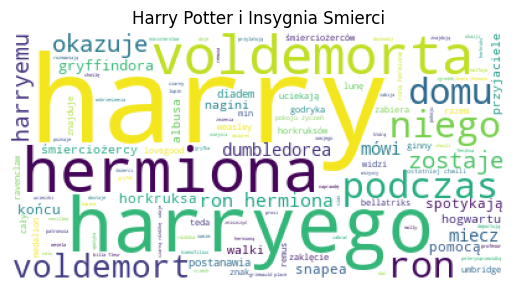

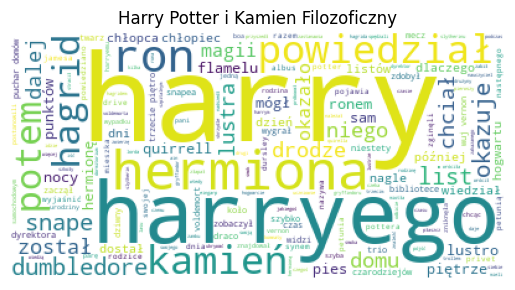

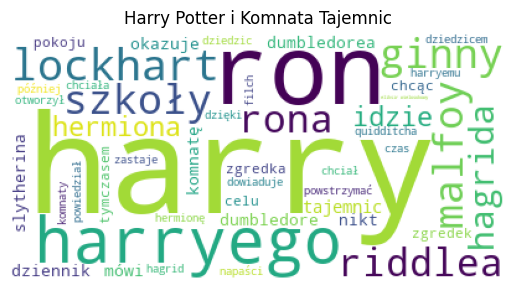

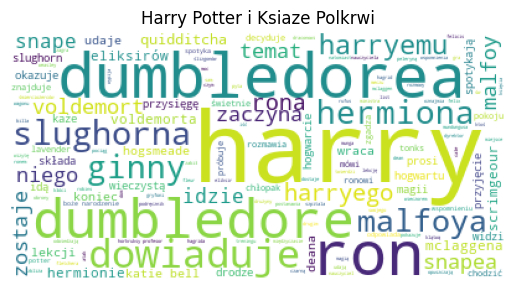

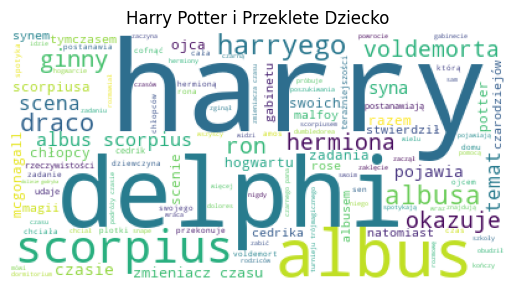

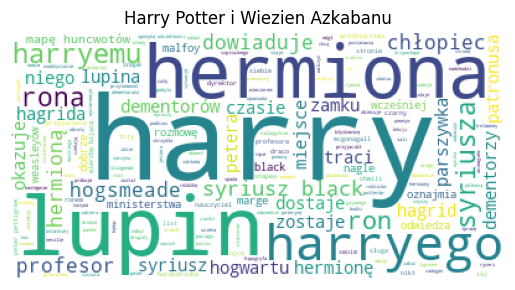

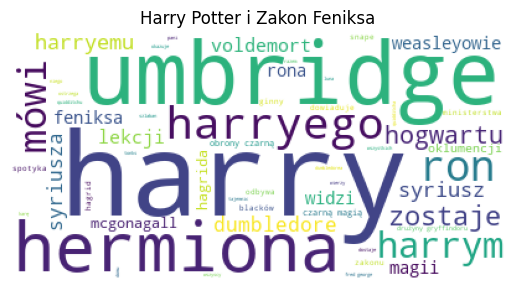

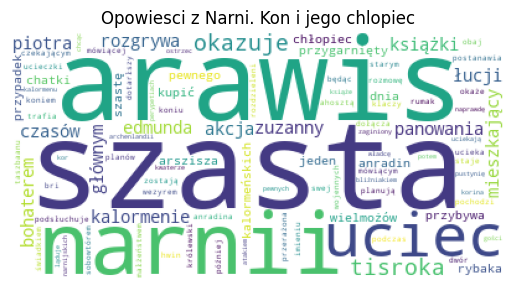

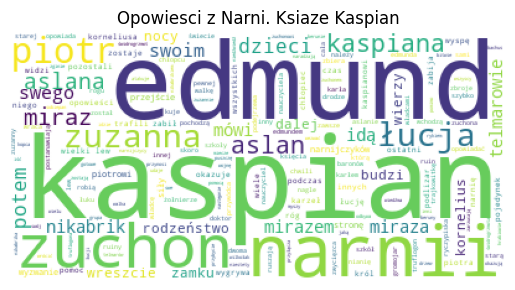

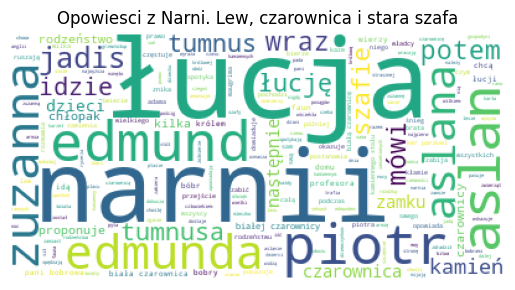

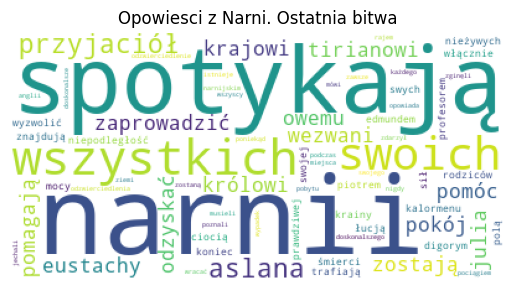

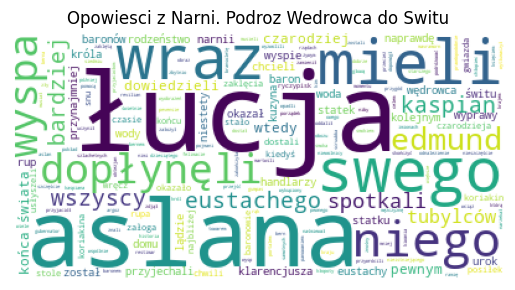

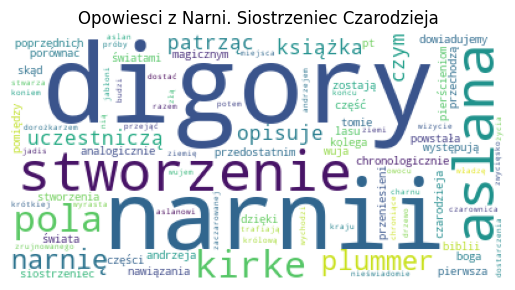

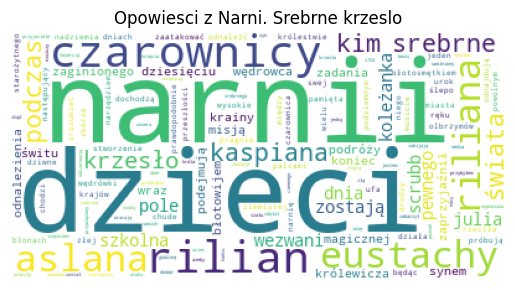

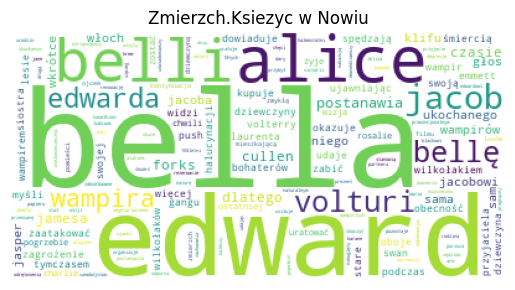

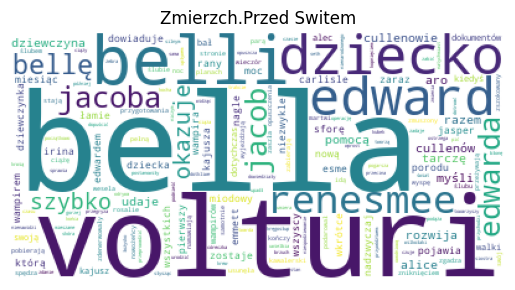

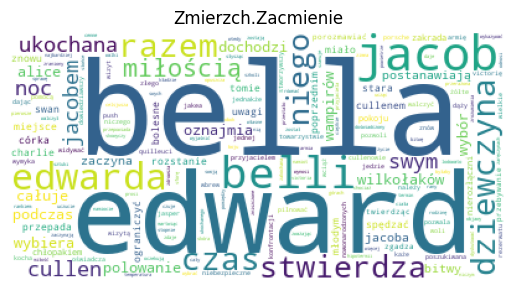

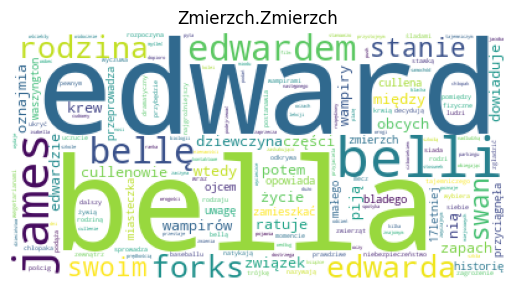

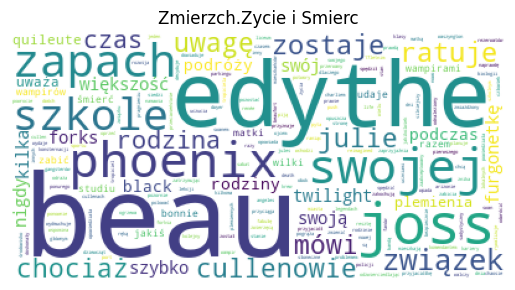

<Figure size 640x480 with 0 Axes>

In [10]:
wordcloud = WordCloud(
        background_color='white',
        max_words=5000,
        contour_width=3,
        contour_color='steelblue'
    )
for index, row in docs.iterrows():
    wordcloud.generate(row['content'])
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(index.replace(".txt", ""))
    plt.show()
    plt.savefig("./wordclouds/{}".format(index.replace(".txt", ".png")))



# Topic Modeling

In [11]:
def plot_top_words(model, feature_names, n_top_words, title, subplots):
    fig, axes = plt.subplots(*subplots, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[-n_top_words:]
        top_features = feature_names[top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()
    plt.savefig(f"./topics/{title}.png")

In [12]:
n_components = 3
feature_names = count_vertorizer.get_feature_names_out()
n_top_features = 20
size = [1, 3]

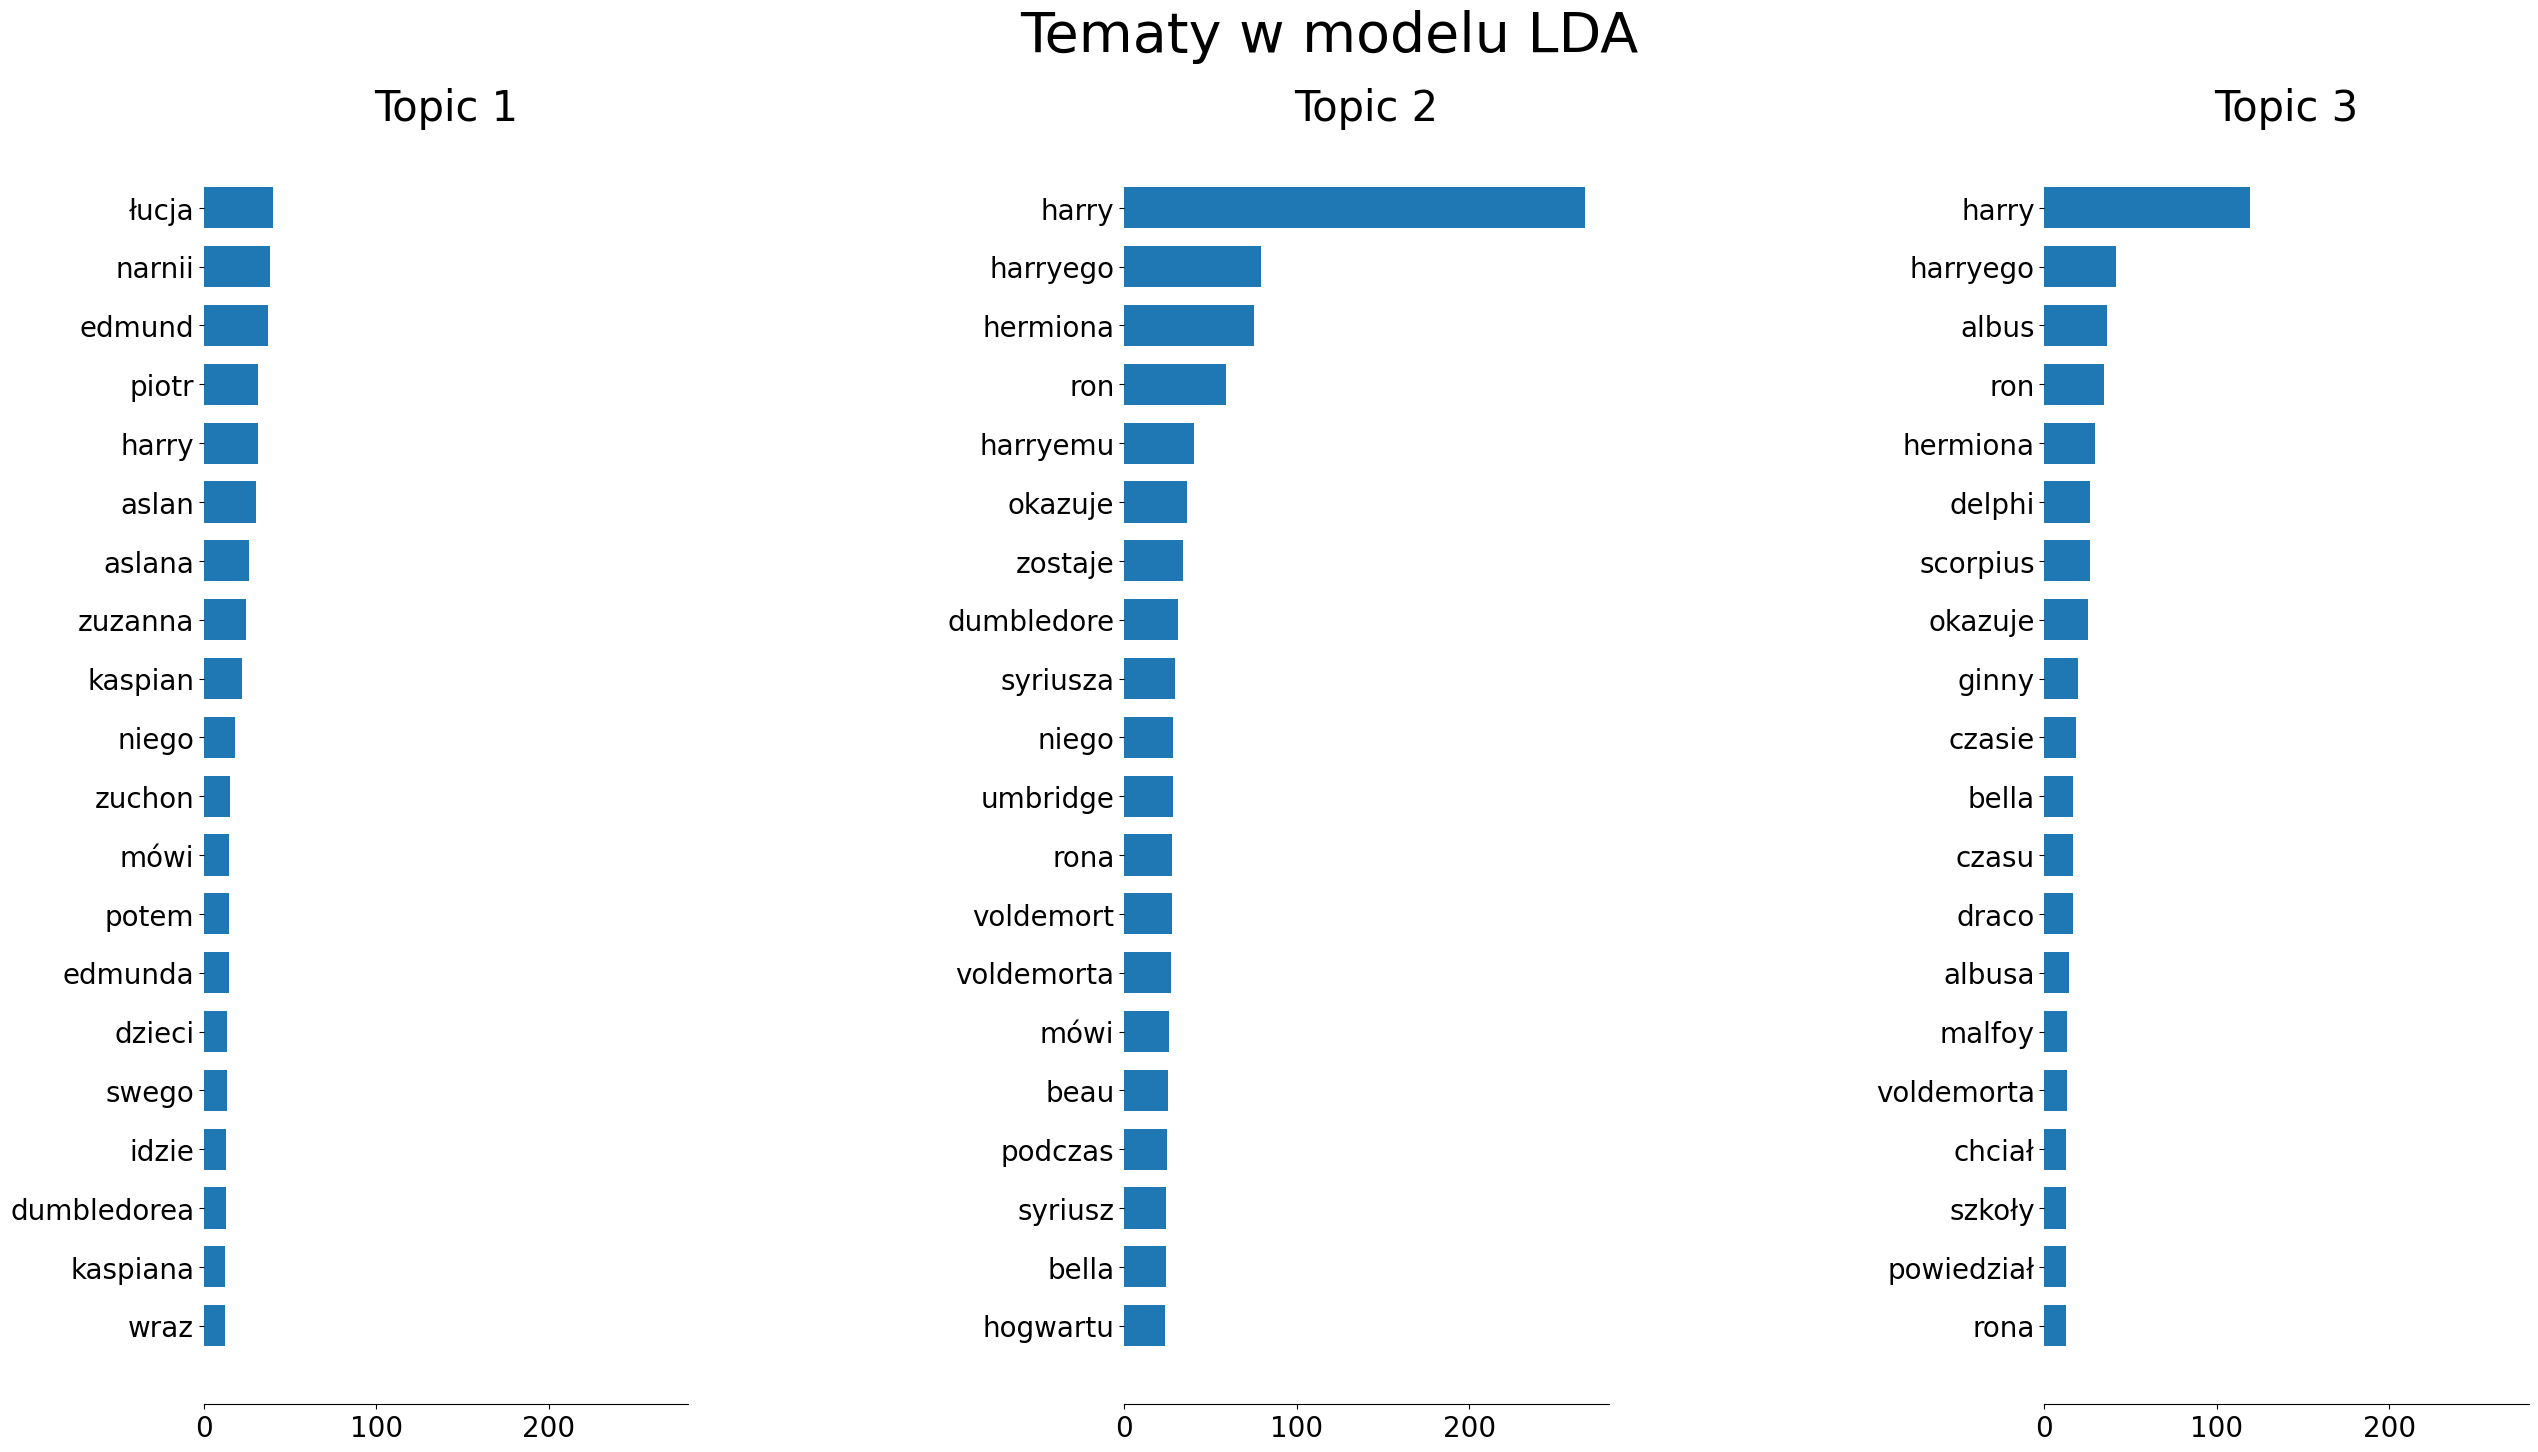

<Figure size 640x480 with 0 Axes>

In [13]:
lda = LatentDirichletAllocation(
    n_components=n_components,
    max_iter=5,
    learning_method='batch',
    learning_offset=50,
    random_state=0
)
lda.fit(counts_tf)
plot_top_words(lda, feature_names, n_top_features, "Tematy w modelu LDA", size)

/opt/miniconda3/envs/py311/lib/python3.11/site-packages/sklearn/utils/extmath.py:547: RuntimeWarning: divide by zero encountered in matmul
  U = Q @ Uhat
/opt/miniconda3/envs/py311/lib/python3.11/site-packages/sklearn/utils/extmath.py:547: RuntimeWarning: overflow encountered in matmul
  U = Q @ Uhat
/opt/miniconda3/envs/py311/lib/python3.11/site-packages/sklearn/utils/extmath.py:547: RuntimeWarning: invalid value encountered in matmul
  U = Q @ Uhat


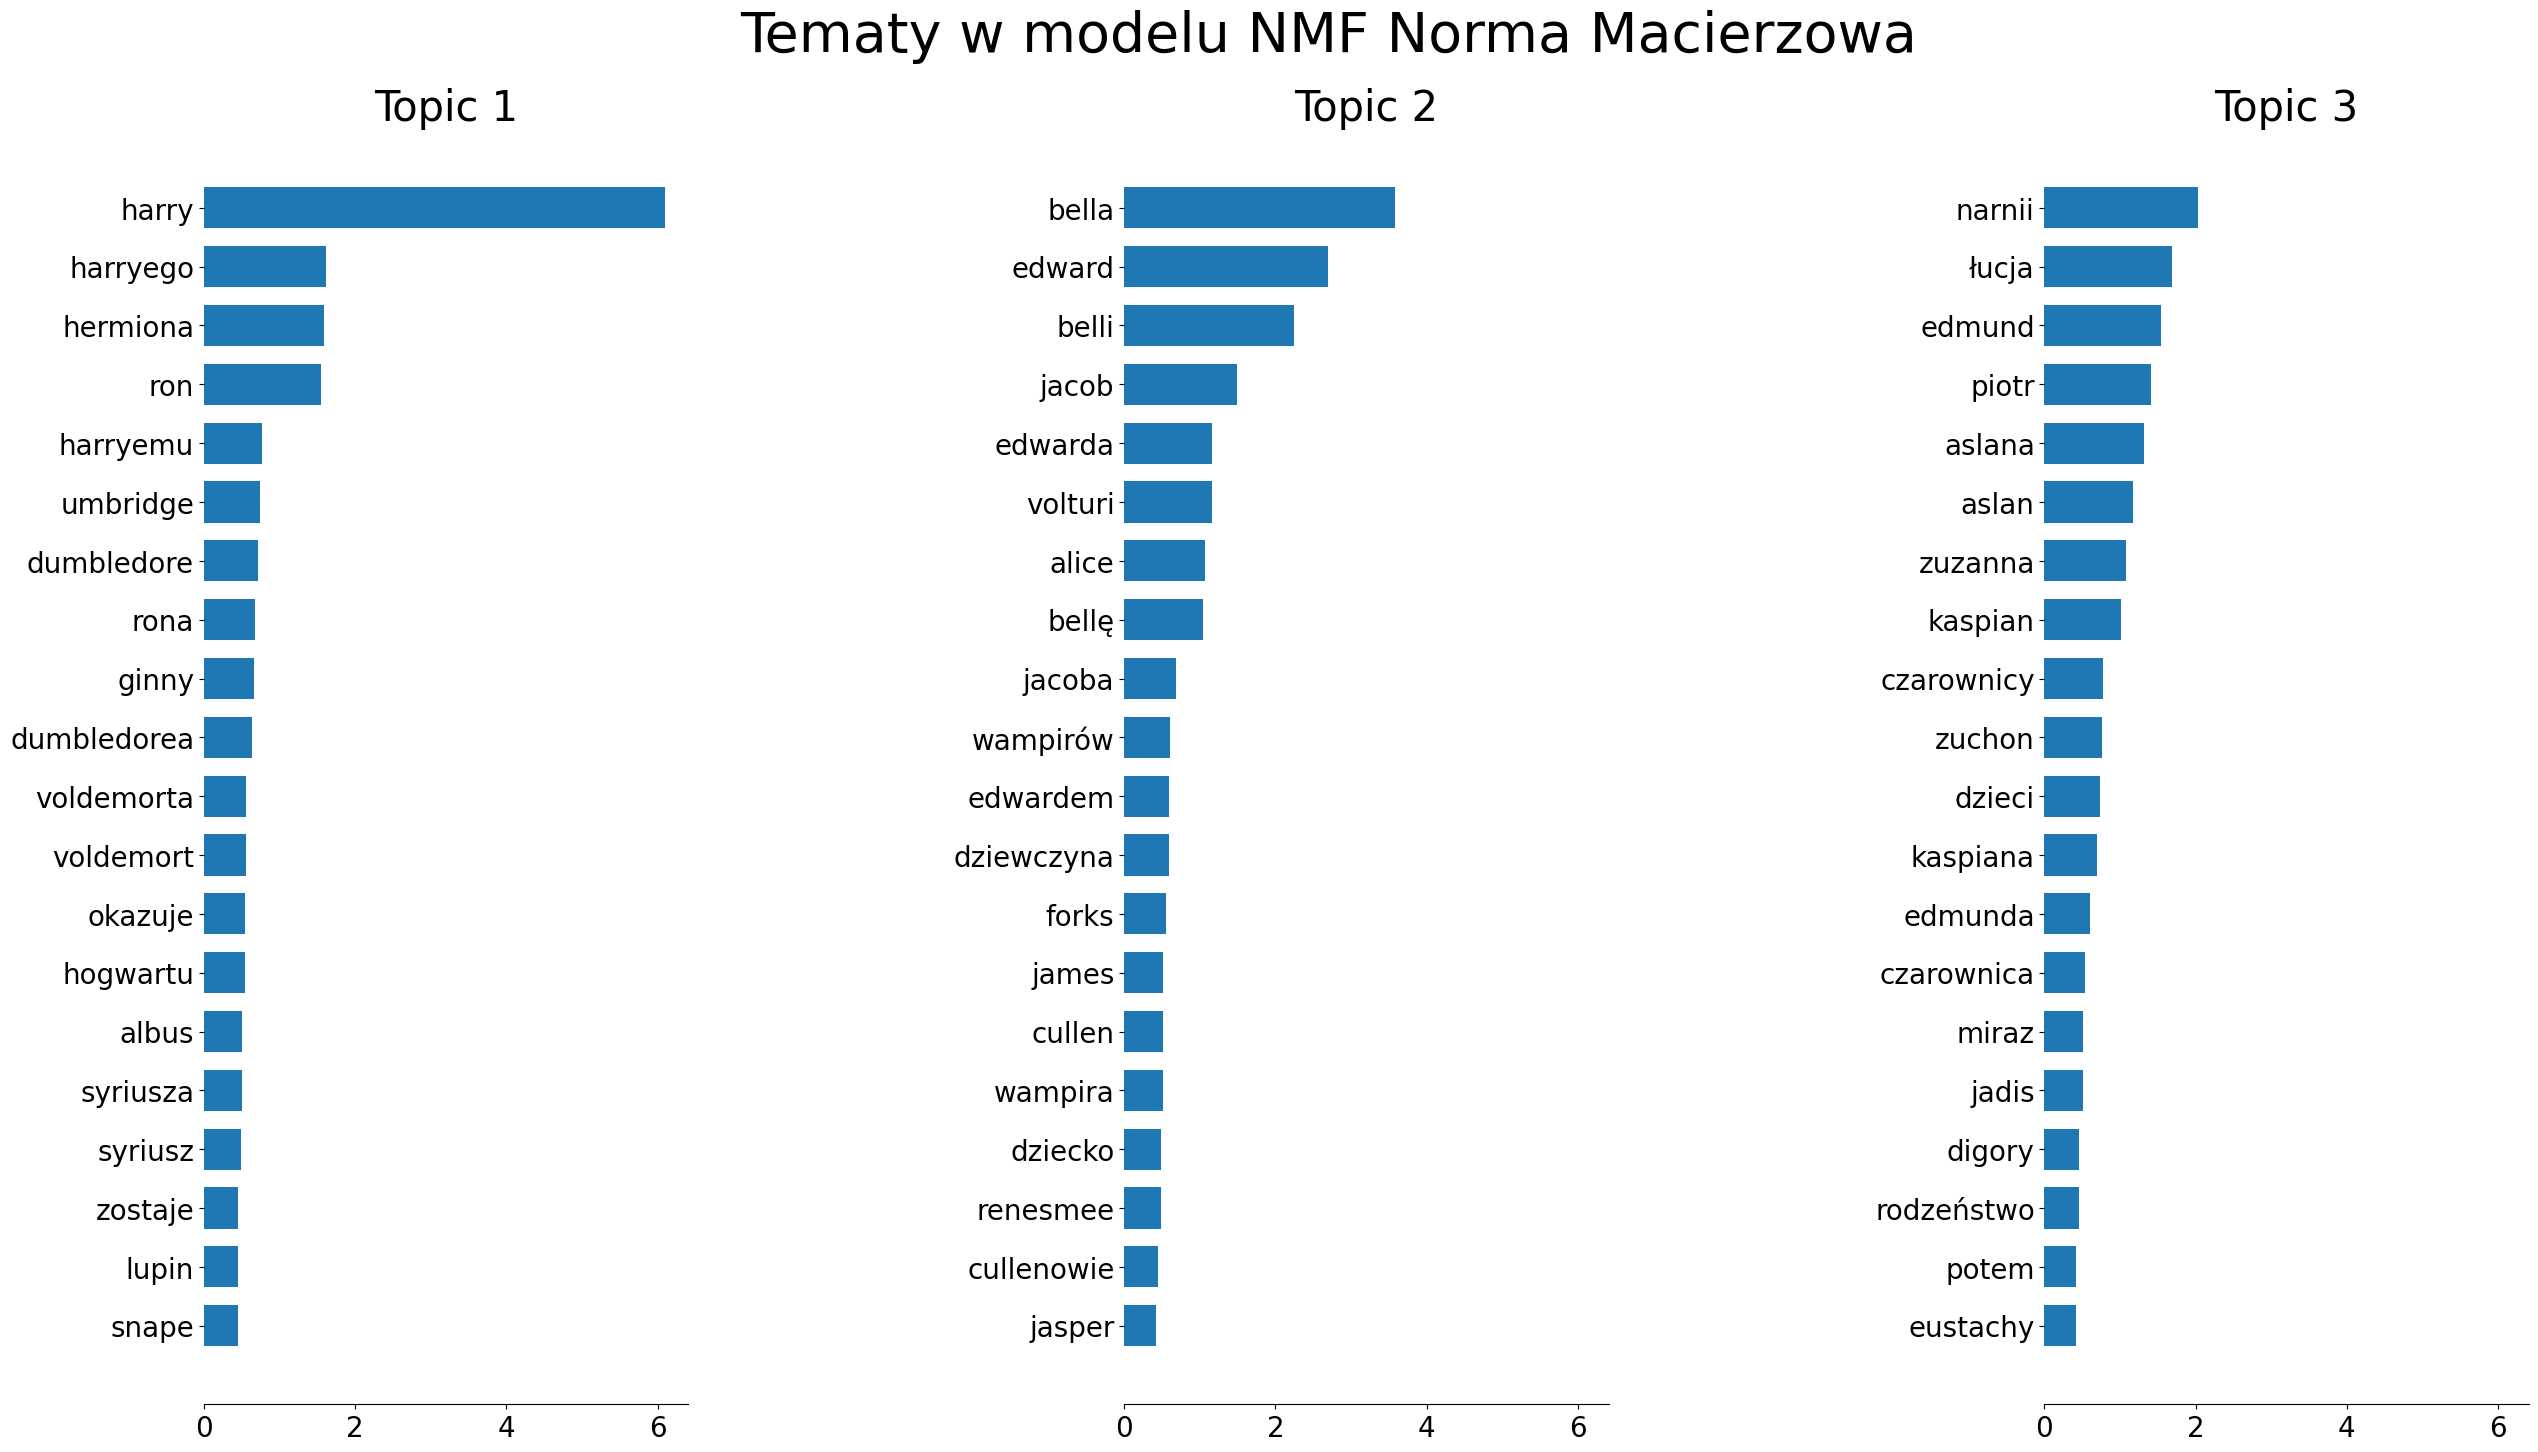

<Figure size 640x480 with 0 Axes>

In [14]:
nmf_fm = NMF(
    n_components=n_components,
    random_state=1,
    alpha_H=.00005,
    alpha_W=.00005,
    l1_ratio=.5
)
nmf_fm.fit(counts_tfidf)
plot_top_words(nmf_fm, feature_names, n_top_features, "Tematy w modelu NMF Norma Macierzowa", size)

/opt/miniconda3/envs/py311/lib/python3.11/site-packages/sklearn/utils/extmath.py:547: RuntimeWarning: divide by zero encountered in matmul
  U = Q @ Uhat
/opt/miniconda3/envs/py311/lib/python3.11/site-packages/sklearn/utils/extmath.py:547: RuntimeWarning: overflow encountered in matmul
  U = Q @ Uhat
/opt/miniconda3/envs/py311/lib/python3.11/site-packages/sklearn/utils/extmath.py:547: RuntimeWarning: invalid value encountered in matmul
  U = Q @ Uhat


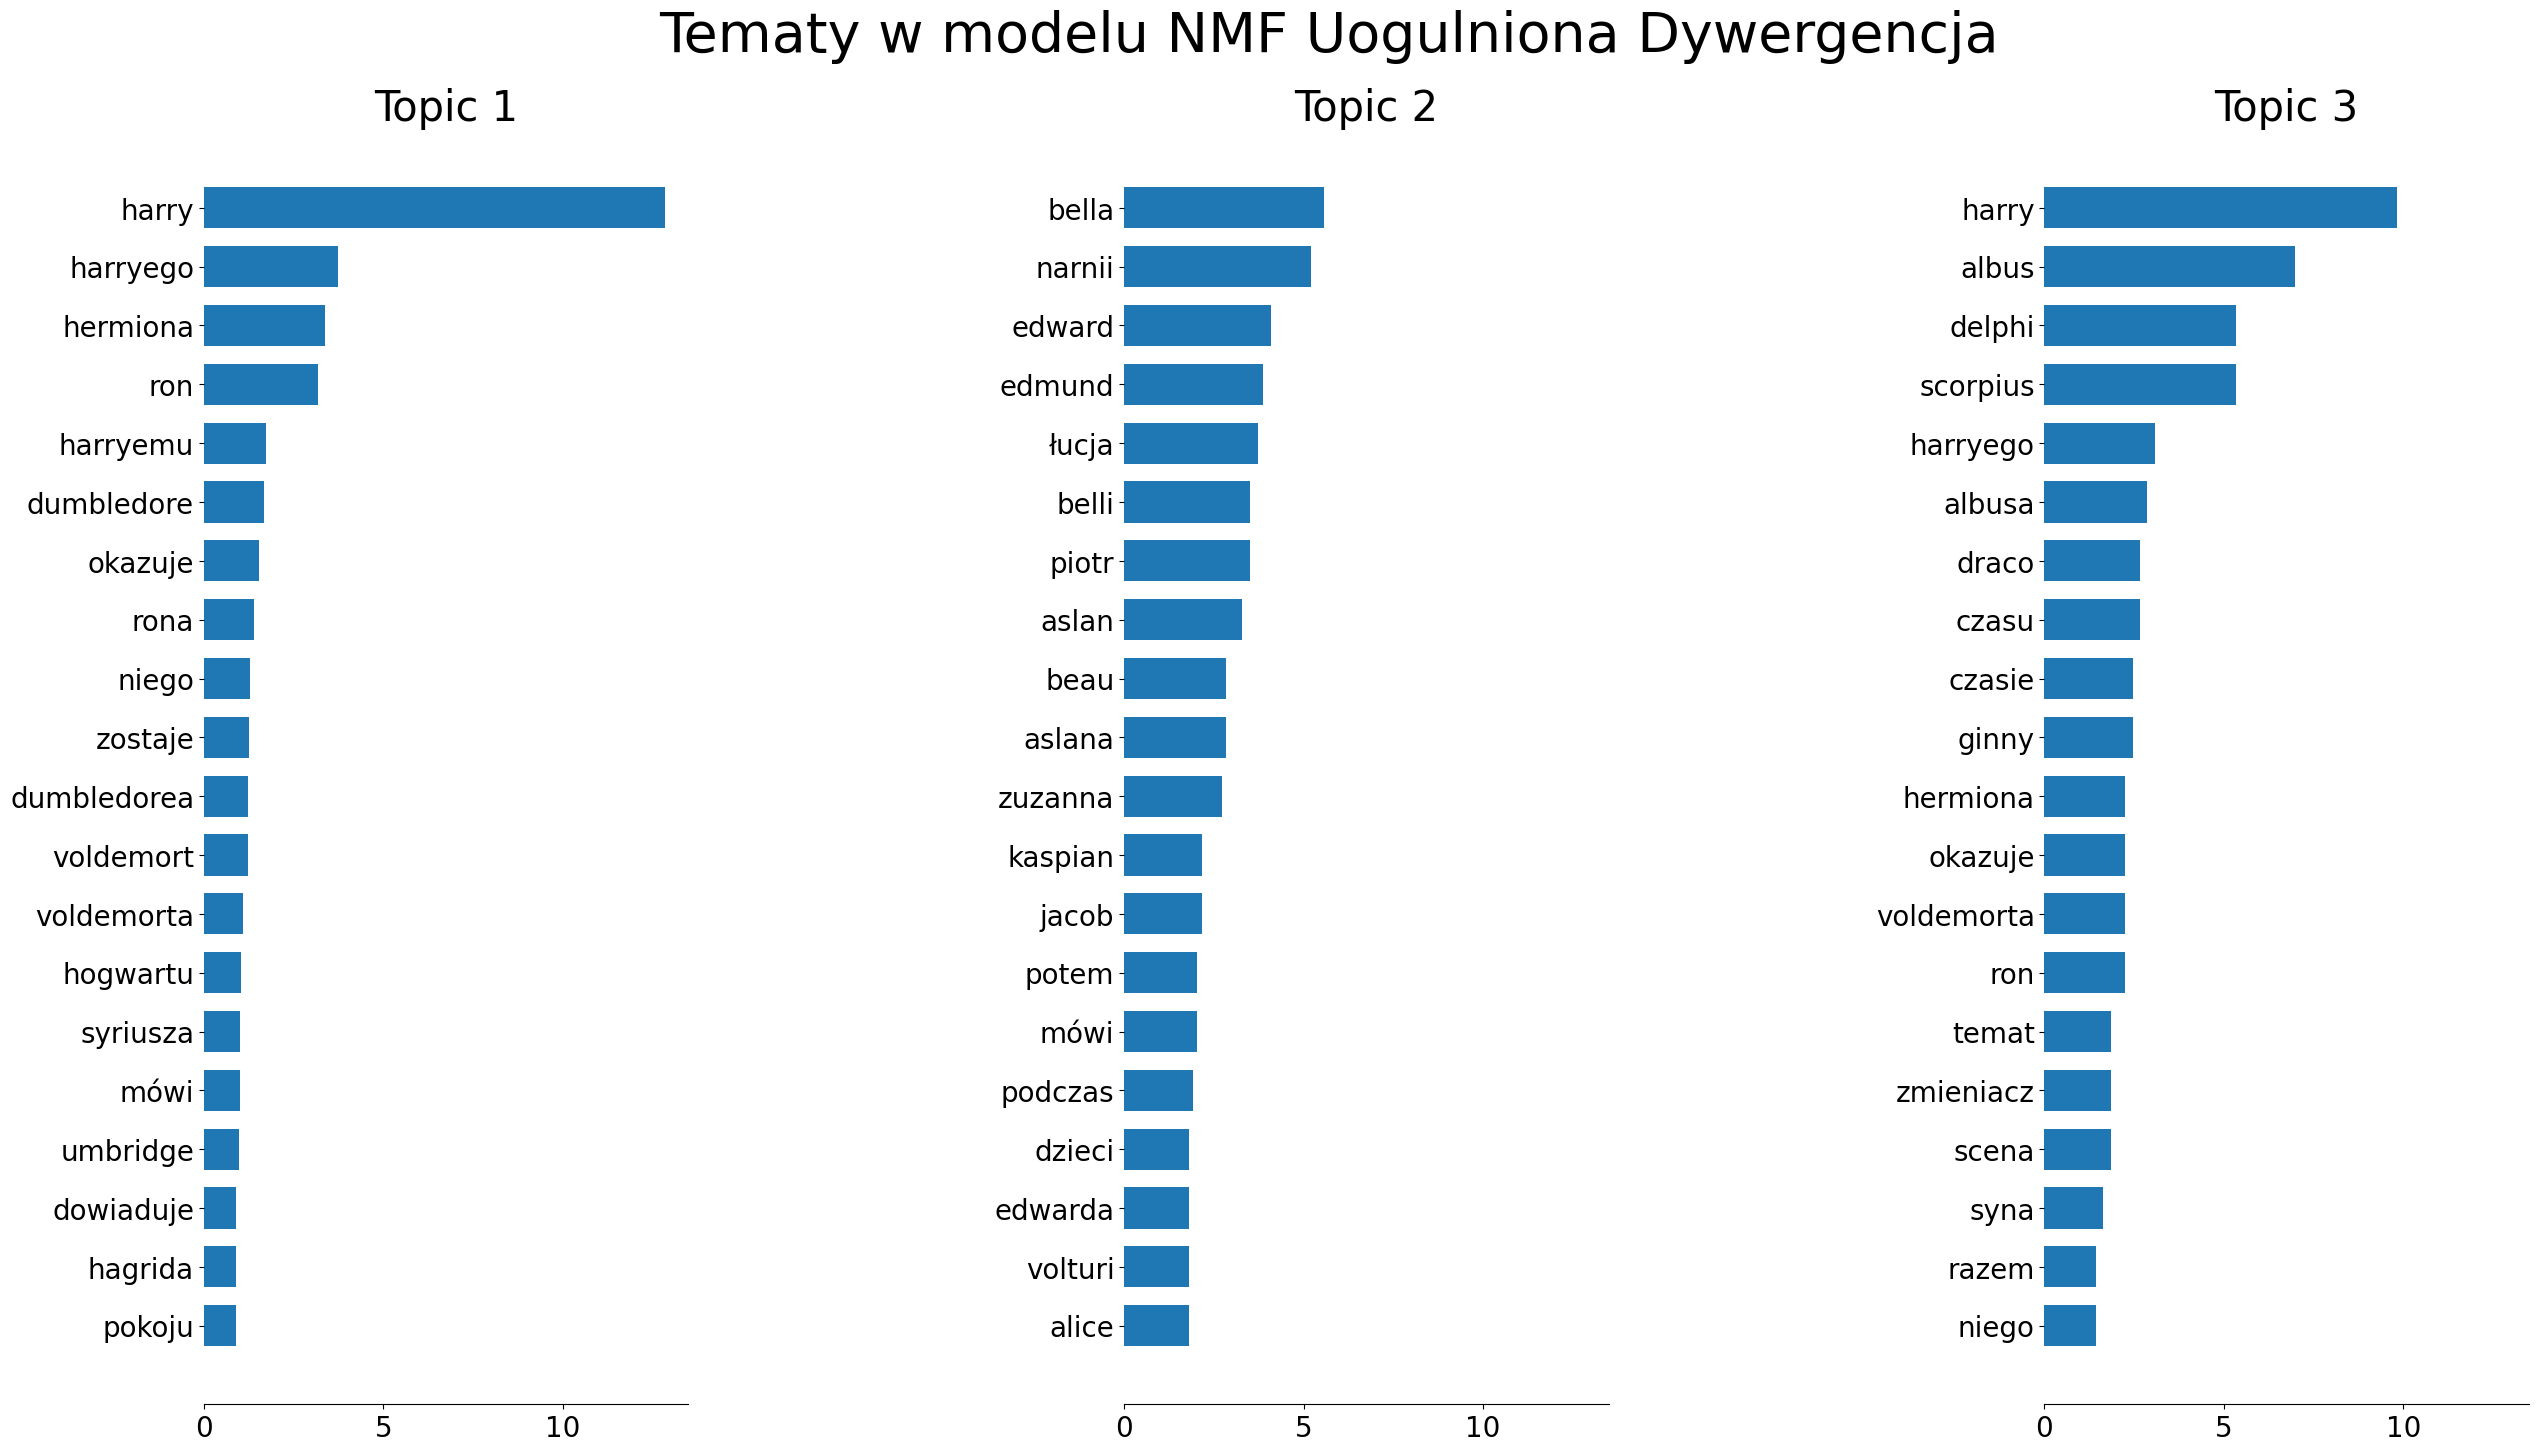

<Figure size 640x480 with 0 Axes>

In [15]:
nmf_kl = NMF(
    n_components=n_components,
    random_state=0,
    beta_loss="kullback-leibler",
    solver='mu',
    max_iter=1000,
    alpha_H=.00005,
    alpha_W=.00005,
    l1_ratio=.5,
)
nmf_kl.fit(counts_tf)
plot_top_words(nmf_kl, feature_names, n_top_features, "Tematy w modelu NMF Uogulniona Dywergencja", size)

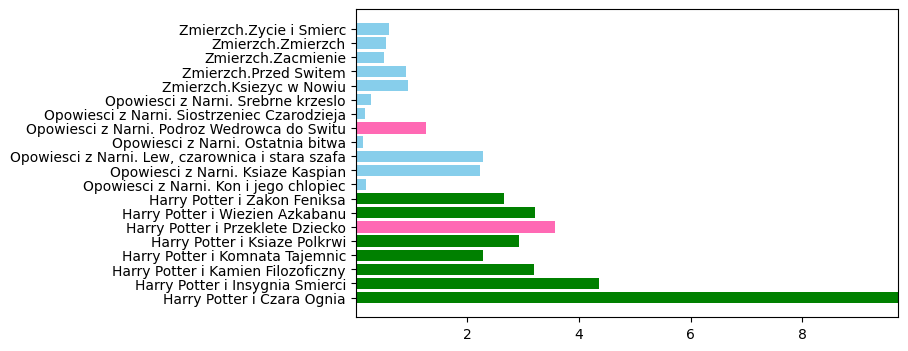

In [16]:
docs_topics = pd.DataFrame(nmf_kl.transform(counts_tf), columns=['Topic 1' ,'Topic 2','Topic 3'])
docs_topics.index = [file_name.replace('.txt', '') for file_name in files_names]
plt.figure(figsize=(7,4))
colors = ['green', 'skyblue', 'hotpink']
left = [0] * len(docs_topics)
for i, col in enumerate(docs_topics.columns):
    plt.barh(docs_topics.index, docs_topics[col], left=left, label=col, color=colors[i])
    left = [left[j]+docs_topics[col].iloc[j] for j in range(len(docs_topics))]

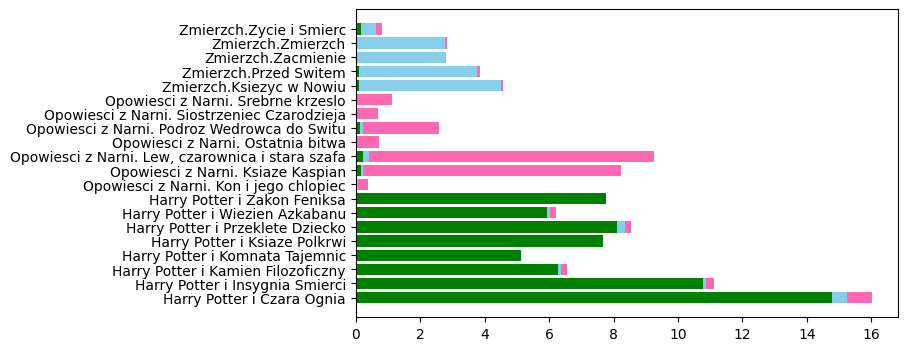

In [17]:
docs_topics = pd.DataFrame(nmf_fm.transform(counts_tf), columns=['Topic 1' ,'Topic 2','Topic 3'])
docs_topics.index = [file_name.replace('.txt', '') for file_name in files_names]
plt.figure(figsize=(7,4))
colors = ['green', 'skyblue', 'hotpink']
left = [0] * len(docs_topics)
for i, col in enumerate(docs_topics.columns):
    plt.barh(docs_topics.index, docs_topics[col], left=left, label=col, color=colors[i])
    left = [left[j]+docs_topics[col].iloc[j] for j in range(len(docs_topics))]
plt.show()

## Analiza skupień

In [18]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [19]:
cs = cosine_similarity(counts_tfidf, counts_tfidf).flatten().reshape(20, 20)
cs

array([[1.        , 0.53268191, 0.43853449, 0.4123129 , 0.4963632 ,
        0.35727042, 0.45803955, 0.48574582, 0.02899606, 0.05589007,
        0.06619731, 0.0306368 , 0.07422379, 0.02659105, 0.03255058,
        0.04998443, 0.04924755, 0.04212003, 0.03855388, 0.02429941],
       [0.53268191, 1.        , 0.48366736, 0.46645687, 0.57970016,
        0.38329682, 0.46248816, 0.58644802, 0.02614015, 0.04796153,
        0.05620667, 0.04379152, 0.0406165 , 0.01789863, 0.02947226,
        0.0406435 , 0.03340237, 0.03022333, 0.02931113, 0.02281644],
       [0.43853449, 0.48366736, 1.        , 0.41102267, 0.43570712,
        0.32200006, 0.38142798, 0.44279525, 0.02307564, 0.0473043 ,
        0.06174469, 0.01744772, 0.05309289, 0.01382983, 0.02535746,
        0.03548978, 0.03300962, 0.02593468, 0.03291728, 0.02368003],
       [0.4123129 , 0.46645687, 0.41102267, 1.        , 0.48402983,
        0.29977085, 0.35952561, 0.44011644, 0.01872266, 0.03273346,
        0.03834007, 0.01857493, 0.03183716, 0

In [20]:
clustering = AgglomerativeClustering(
    n_clusters=3,
    metric="euclidean",
    linkage="ward",
    compute_distances=True,
).fit(cs)
clustering.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0])

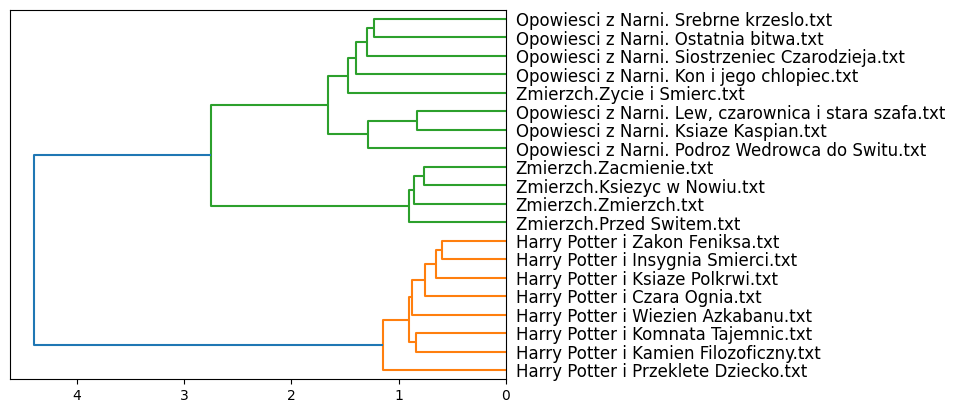

In [21]:
plot_dendrogram(
    clustering,
    labels = files_names,
    truncate_mode = 'level',
    orientation = 'left',
)
plt.show()

In [22]:
ed = euclidean_distances(counts_tf, counts_tf).flatten().reshape(20, 20)
ed

array([[  0.        , 102.90286682, 116.7261753 , 121.82364303,
        110.53506231, 124.19742348, 116.75187365, 112.31206525,
        145.83552379, 153.78231368, 154.81601984, 145.81838019,
        145.82180907, 146.01369799, 145.94176921, 147.75994044,
        147.31938094, 146.58103561, 146.66628788, 148.68422916],
       [102.90286682,   0.        ,  75.92101158,  78.61297603,
         69.04346457,  92.86549413,  78.42193571,  68.8839604 ,
        101.25709852, 114.7519063 , 117.04272724, 100.99504938,
        103.5422619 , 101.51354589, 101.39033485, 105.47037499,
        104.97618778, 102.76672613, 103.1988372 , 105.58408971],
       [116.7261753 ,  75.92101158,   0.        ,  54.8634669 ,
         62.16912417,  85.80209788,  60.09991681,  62.32976817,
         65.84071689,  87.09764635,  90.32718306,  65.89385404,
         69.79254975,  66.06814664,  66.31741853,  73.47108275,
         72.20803279,  68.78226516,  68.83313156,  73.07530363],
       [121.82364303,  78.61297603,  

In [23]:
clustering_ed = AgglomerativeClustering(
    n_clusters=3,
    metric="precomputed",
    linkage="complete",
    compute_distances=True,
).fit(ed)
clustering_ed.labels_

array([1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

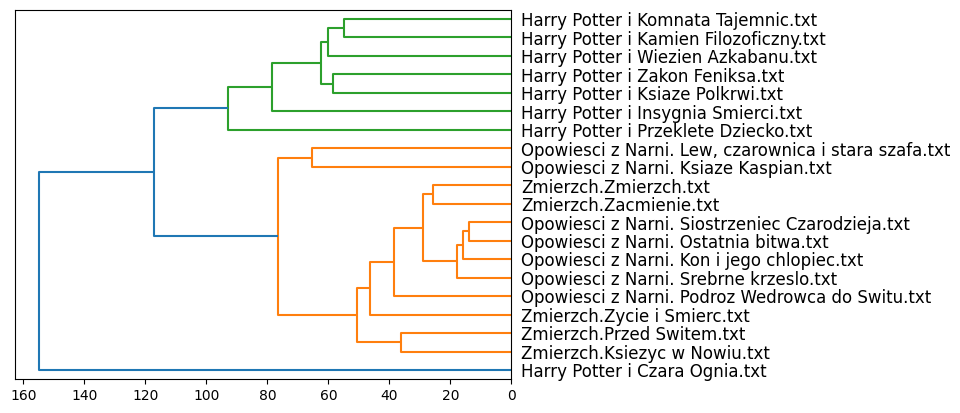

In [24]:
plot_dendrogram(
    clustering_ed,
    labels = files_names,
    truncate_mode = 'level',
    orientation = 'left',
)
plt.show()

# N-gramy


In [25]:
documents_tokenized = {}
for key in documents:
    documents_tokenized[key] = word_tokenize(documents[key], language='polish')
print(json.dumps(documents_tokenized, indent=4, ensure_ascii=False))

{
    "Harry Potter i Czara Ognia.txt": [
        "lord",
        "voldemort",
        "wraz",
        "swoim",
        "sługą",
        "glizdogonem",
        "przybywa",
        "domu",
        "należącego",
        "niegdyś",
        "rodziny",
        "riddleów",
        "położonego",
        "little",
        "hangleton",
        "układają",
        "plan",
        "dotyczący",
        "zamordowania",
        "harryego",
        "pottera",
        "pomóc",
        "czarnemu",
        "panu",
        "odzyskaniu",
        "dawnej",
        "mocy",
        "mowa",
        "wiernym",
        "słudze",
        "czarnego",
        "pana",
        "wkrótce",
        "znaleźć",
        "hogwarcie",
        "słyszy",
        "mieszkający",
        "nieopodal",
        "ogrodnik",
        "frank",
        "bryce",
        "voldemort",
        "odkrywając",
        "mężczyzna",
        "podsłuchuje",
        "zaprasza",
        "środka",
        "uśmierca",
        "harry",
        "budzi",

Harry Potter i Czara Ognia.txt


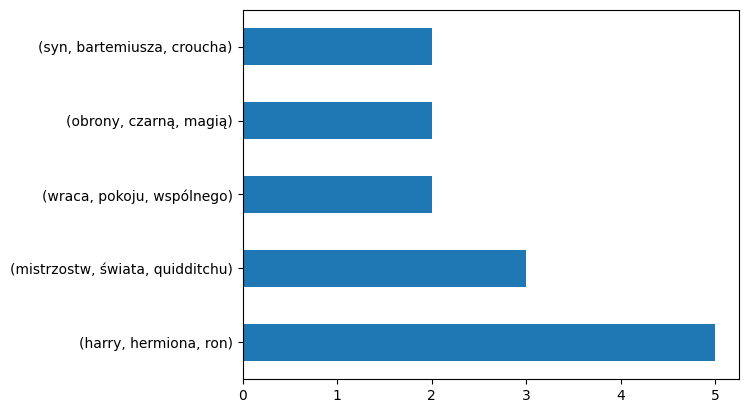

Harry Potter i Insygnia Smierci.txt


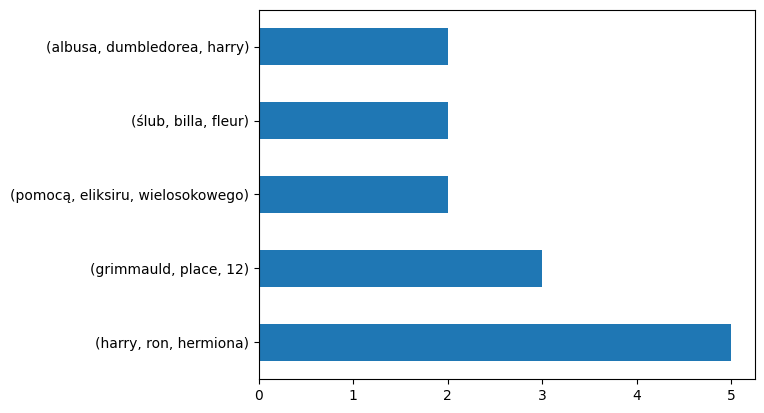

Harry Potter i Kamien Filozoficzny.txt


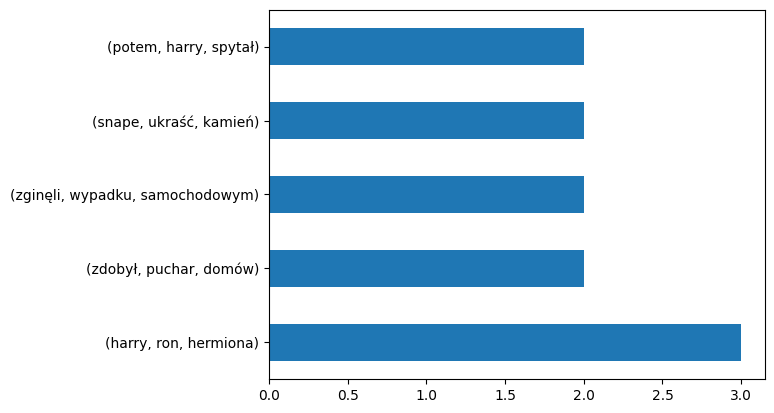

Harry Potter i Komnata Tajemnic.txt


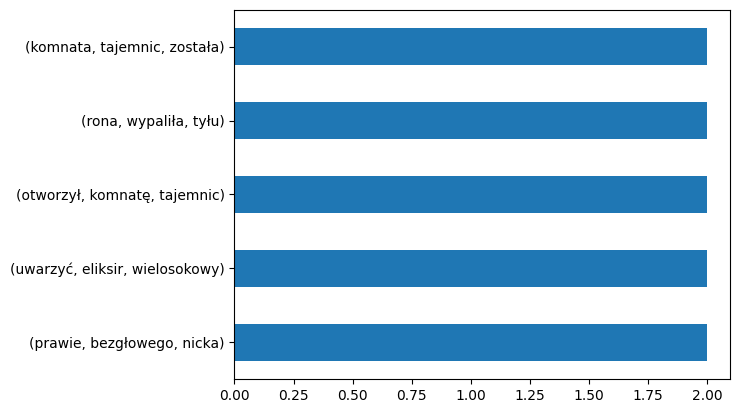

Harry Potter i Ksiaze Polkrwi.txt


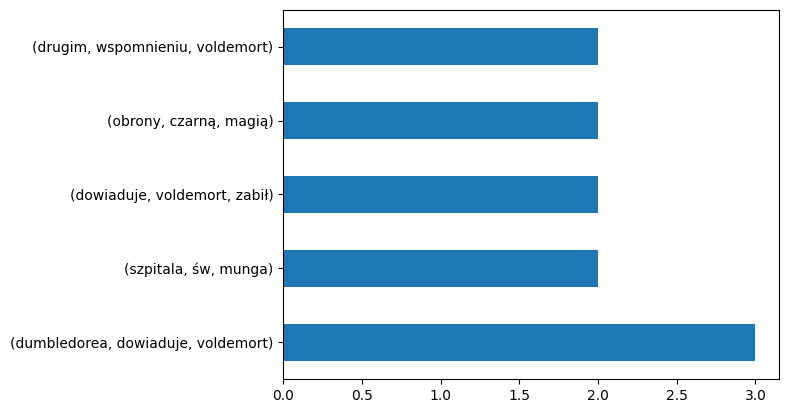

Harry Potter i Przeklete Dziecko.txt


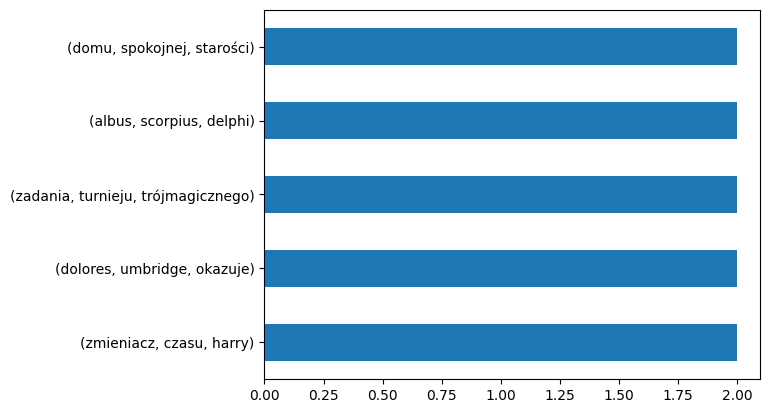

Harry Potter i Wiezien Azkabanu.txt


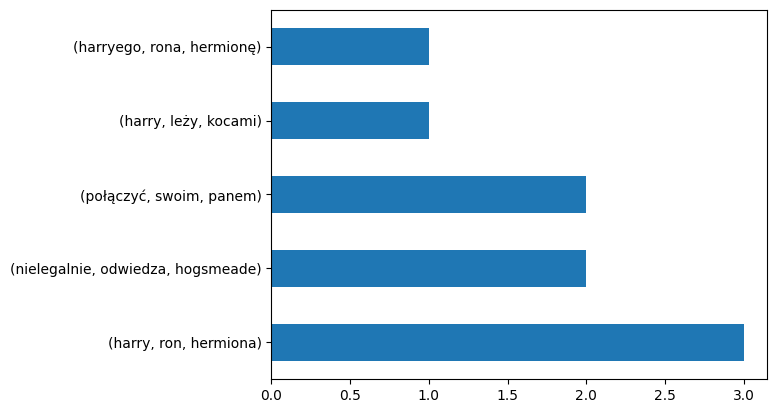

Harry Potter i Zakon Feniksa.txt


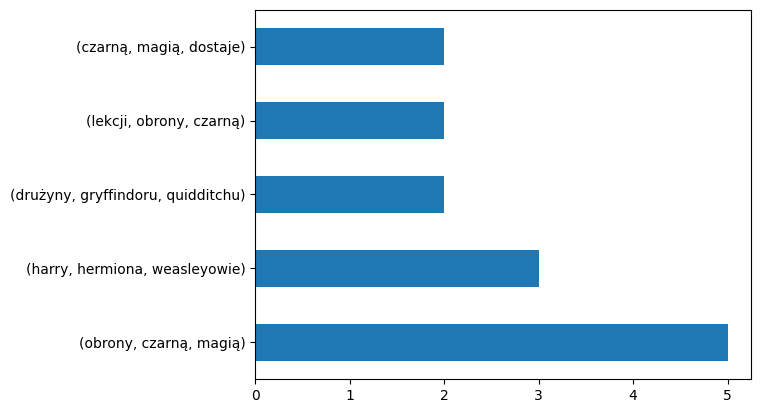

Opowiesci z Narni. Kon i jego chlopiec.txt


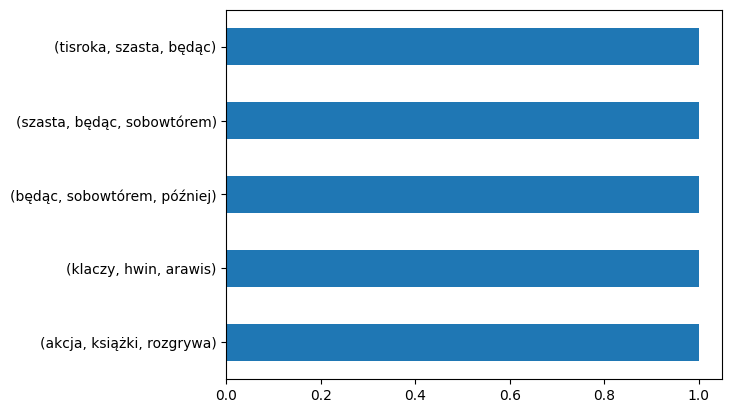

Opowiesci z Narni. Ksiaze Kaspian.txt


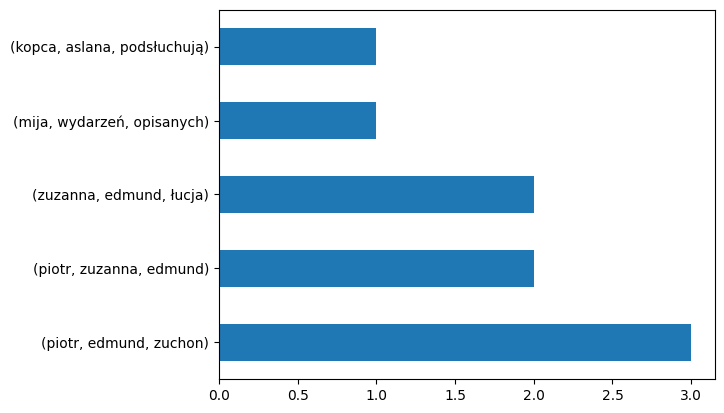

Opowiesci z Narni. Lew, czarownica i stara szafa.txt


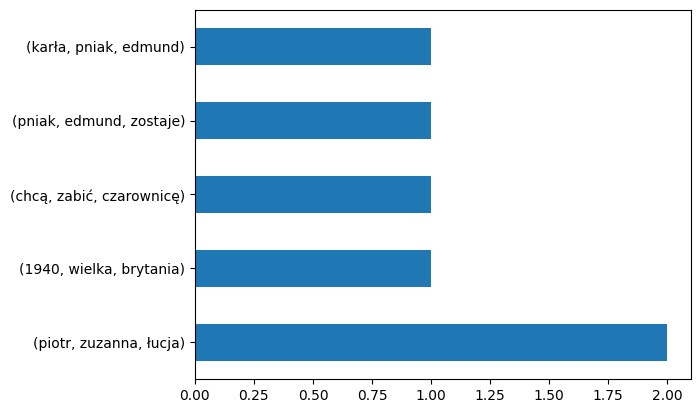

Opowiesci z Narni. Ostatnia bitwa.txt


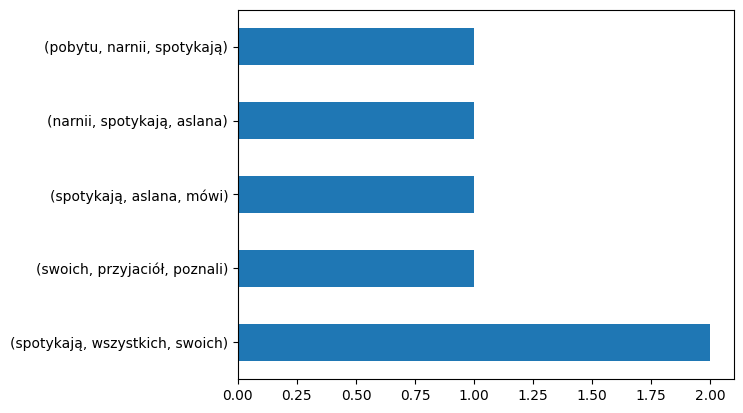

Opowiesci z Narni. Podroz Wedrowca do Switu.txt


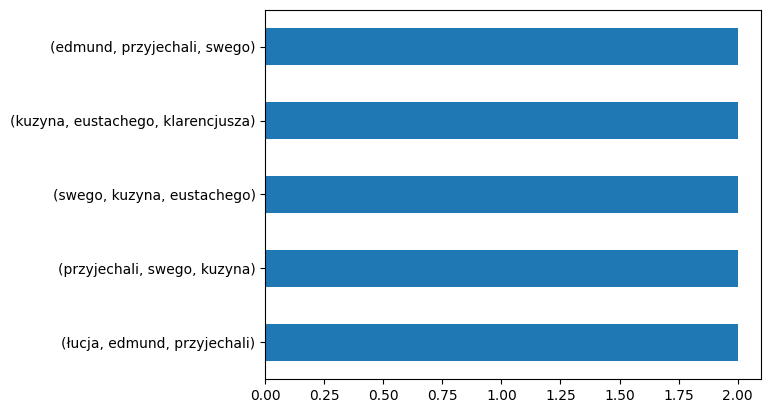

Opowiesci z Narni. Siostrzeniec Czarodzieja.txt


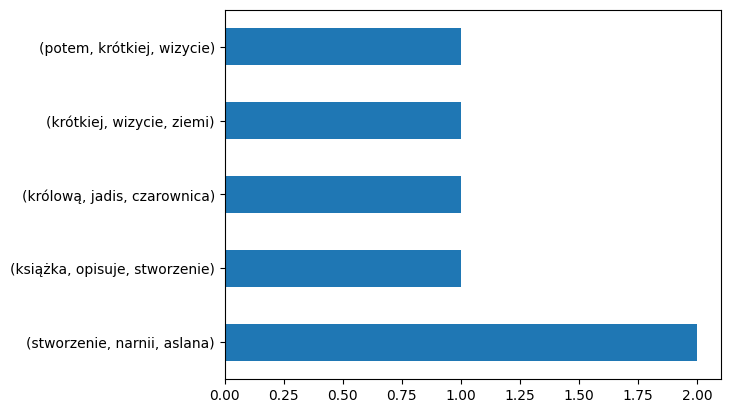

Opowiesci z Narni. Srebrne krzeslo.txt


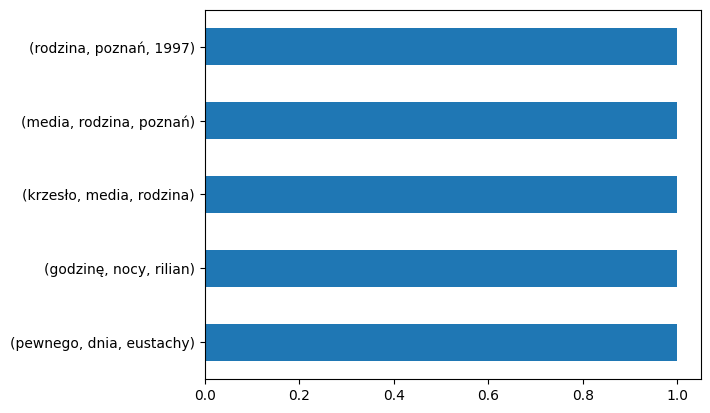

Zmierzch.Ksiezyc w Nowiu.txt


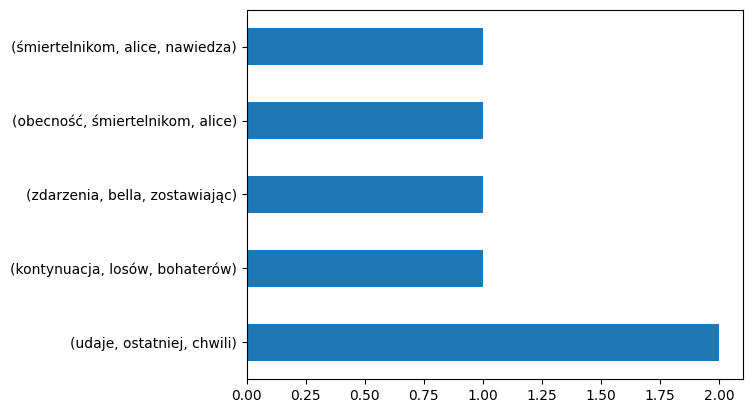

Zmierzch.Przed Switem.txt


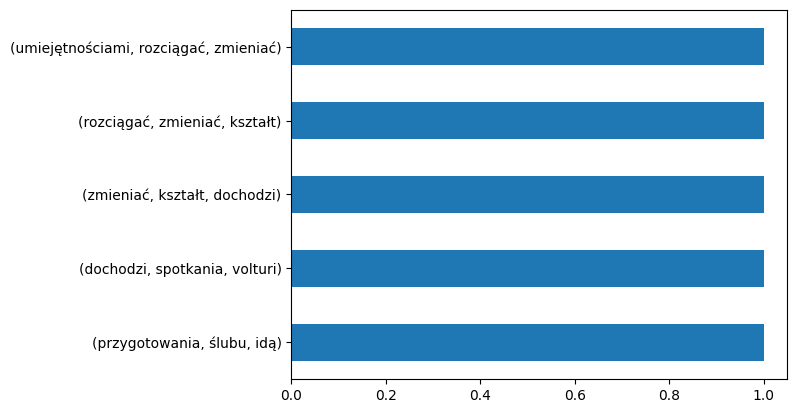

Zmierzch.Zacmienie.txt


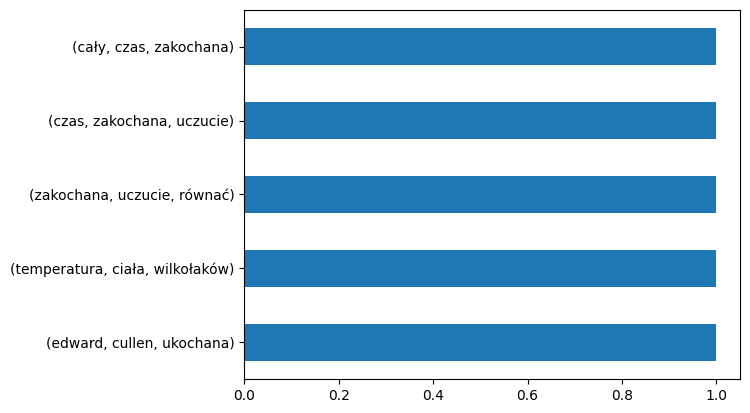

Zmierzch.Zmierzch.txt


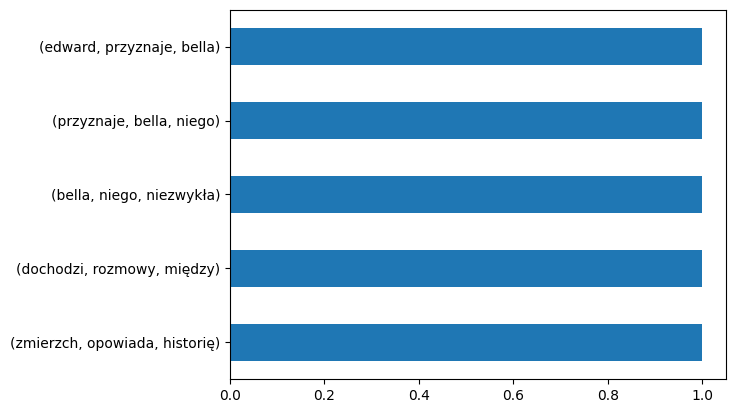

Zmierzch.Zycie i Smierc.txt


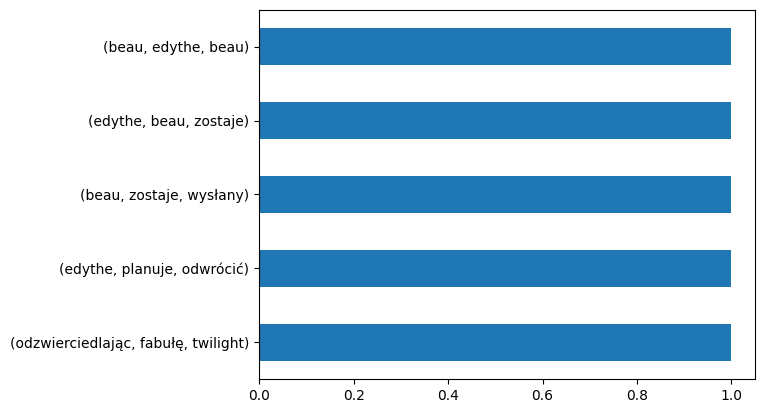

In [26]:
for title in documents_tokenized:
    n_gram = pd.Series(ngrams(documents_tokenized[title], 3)).value_counts()
    # print(list(ngrams(documents_tokenized[title], 3)))
    print(title)
    n_gram[:5].plot.barh()
    plt.show()


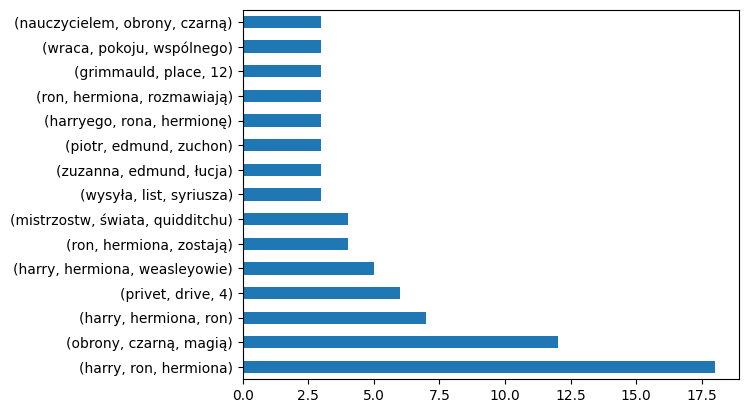

In [27]:
texts = ' '.join(docs['content']).split(" ")
n_gram_texts = pd.Series(ngrams(texts, 3)).value_counts()
n_gram_texts[:15].plot.barh()
plt.show()